In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split

from utils.feature_extraction import create_feature_names
from utils.file_generator import eeg_file_generator

C:\Users\1milo\AppData\Local\Temp\ipykernel_2956\2404653573.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Creating an empty data frame with feature names

In [3]:
columns = create_feature_names(["FP1", "FP2", "F3", "F4", "C3", "C4", "O1", "O2"])
df = pd.DataFrame(columns=columns)
df.head()

,FP1_spectral_entropy,FP1_signal_varaince,FP1_peak_frequency,FP1_max_value,FP1_zero_crossing,FP2_spectral_entropy,FP2_signal_varaince,FP2_peak_frequency,FP2_max_value,FP2_zero_crossing,...,O1_peak_frequency,O1_max_value,O1_zero_crossing,O2_spectral_entropy,O2_signal_varaince,O2_peak_frequency,O2_max_value,O2_zero_crossing,time_since_start,label


Loading feature matricies and adding them to dataframe

In [4]:
for feature_matrix in eeg_file_generator("../data/eeg_features_2000"):
    matrix = np.load(feature_matrix)
    current_df = pd.DataFrame(matrix, columns=columns)
    df = pd.concat([df, current_df], ignore_index= True)

C:\Users\1milo\AppData\Local\Temp\ipykernel_2956\392526067.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, current_df], ignore_index= True)


Displaying stats and infos about dataframe

In [5]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FP1_spectral_entropy  78369 non-null  float64
 1   FP1_signal_varaince   78369 non-null  float64
 2   FP1_peak_frequency    78369 non-null  float64
 3   FP1_max_value         78369 non-null  float64
 4   FP1_zero_crossing     78369 non-null  float64
 5   FP2_spectral_entropy  78369 non-null  float64
 6   FP2_signal_varaince   78369 non-null  float64
 7   FP2_peak_frequency    78369 non-null  float64
 8   FP2_max_value         78369 non-null  float64
 9   FP2_zero_crossing     78369 non-null  float64
 10  F3_spectral_entropy   78338 non-null  float64
 11  F3_signal_varaince    78369 non-null  float64
 12  F3_peak_frequency     78369 non-null  float64
 13  F3_max_value          78369 non-null  float64
 14  F3_zero_crossing      78369 non-null  float64
 15  F4_spectral_entropy

,FP1_spectral_entropy,FP1_signal_varaince,FP1_peak_frequency,FP1_max_value,FP1_zero_crossing,FP2_spectral_entropy,FP2_signal_varaince,FP2_peak_frequency,FP2_max_value,FP2_zero_crossing,...,O1_peak_frequency,O1_max_value,O1_zero_crossing,O2_spectral_entropy,O2_signal_varaince,O2_peak_frequency,O2_max_value,O2_zero_crossing,time_since_start,label
count,78369.000000,7.836900e+04,78369.000000,78369.000000,78369.000000,78369.000000,7.836900e+04,78369.000000,78369.000000,78369.000000,...,78369.000000,78369.000000,78369.000000,78369.000000,7.836900e+04,78369.000000,78369.000000,78369.000000,78369.000000,59216.000000
mean,2.951281,9.869321e-07,38.140734,0.000155,105.837933,3.000376,5.210833e-07,36.955190,0.000147,107.946828,...,27.455959,0.000076,90.330603,3.233224,7.812968e-07,34.907916,0.000076,101.044265,1693.921908,1.991624
std,0.922007,8.913532e-05,182.914421,0.002106,214.731509,0.932302,4.973465e-05,179.761757,0.001820,210.502395,...,146.722189,0.001786,125.344860,0.865049,7.411134e-05,174.181355,0.002045,206.302240,1099.796913,1.320023
min,0.224408,1.013830e-12,0.000000,-0.040397,0.000000,0.227701,8.748614e-13,0.000000,-0.033085,0.000000,...,0.000000,-0.031257,0.000000,0.226012,9.147382e-13,0.000000,-0.030032,0.000000,0.000000,0.000000
25%,2.312150,2.846771e-10,1.000000,0.000046,26.000000,2.328293,2.663638e-10,1.000000,0.000045,27.000000,...,1.000000,0.000025,32.000000,2.708667,9.366172e-11,1.000000,0.000024,30.000000,816.000000,1.000000
50%,2.773507,7.939765e-10,1.000000,0.000102,57.000000,2.844490,7.341633e-10,1.000000,0.000098,60.000000,...,1.000000,0.000037,65.000000,3.242494,1.490836e-10,1.000000,0.000034,59.000000,1632.000000,2.000000
75%,3.589874,2.087118e-09,2.000000,0.000171,105.000000,3.672059,1.895498e-09,2.000000,0.000163,112.000000,...,3.000000,0.000055,110.000000,3.793136,2.773627e-10,3.000000,0.000049,96.000000,2448.000000,3.000000
max,6.445318,1.402741e-02,1000.000000,0.287186,1999.000000,6.228590,9.707690e-03,1000.000000,0.228641,1999.000000,...,1000.000000,0.234781,1999.000000,6.512862,1.483037e-02,1000.000000,0.235508,1999.000000,7054.000000,4.000000


In [6]:
df.head()

,FP1_spectral_entropy,FP1_signal_varaince,FP1_peak_frequency,FP1_max_value,FP1_zero_crossing,FP2_spectral_entropy,FP2_signal_varaince,FP2_peak_frequency,FP2_max_value,FP2_zero_crossing,...,O1_peak_frequency,O1_max_value,O1_zero_crossing,O2_spectral_entropy,O2_signal_varaince,O2_peak_frequency,O2_max_value,O2_zero_crossing,time_since_start,label
0,3.123067,9.120155e-10,1.0,0.000115,29.0,2.715453,1.112129e-09,1.0,0.000135,39.0,...,1.0,0.000035,36.0,2.111419,1.552306e-10,1.0,0.000039,12.0,0.0,NaN
1,2.508454,1.904162e-09,2.0,0.000139,61.0,2.016830,2.494443e-09,1.0,0.000171,25.0,...,5.0,0.000027,71.0,3.260962,1.041839e-10,1.0,0.000024,66.0,2.0,NaN
2,2.475995,2.012767e-09,6.0,0.000122,23.0,2.422785,1.744479e-09,6.0,0.000119,7.0,...,3.0,0.000042,49.0,3.169798,1.085781e-10,2.0,0.000022,49.0,4.0,NaN
3,2.192130,1.928754e-09,2.0,0.000118,15.0,1.915993,2.717642e-09,2.0,0.000115,9.0,...,2.0,0.000031,26.0,2.028160,1.603925e-10,2.0,0.000021,67.0,6.0,NaN
4,2.206609,2.164143e-09,2.0,0.000157,16.0,2.251224,2.293734e-09,2.0,0.000169,16.0,...,2.0,0.000014,24.0,3.129273,1.565664e-10,2.0,0.000028,36.0,8.0,NaN


Changing nan values to zeros and incrementing rest of the values for one so we can get six seperate classes

0 => Not invoked; 1 => Disgust; 2 => Fear; 3 => Sad; 4 => Neutral; 5 => Happy 


In [7]:
df['label'] = df['label'].apply(lambda x: x + 1 if pd.notna(x) else 0)
df['label'].max()

5.0

In [8]:
result = df.groupby('label')[columns].agg(['mean', 'std'])

Plotting individual statistics by feature and comparing each feature with same feature in diffrent class

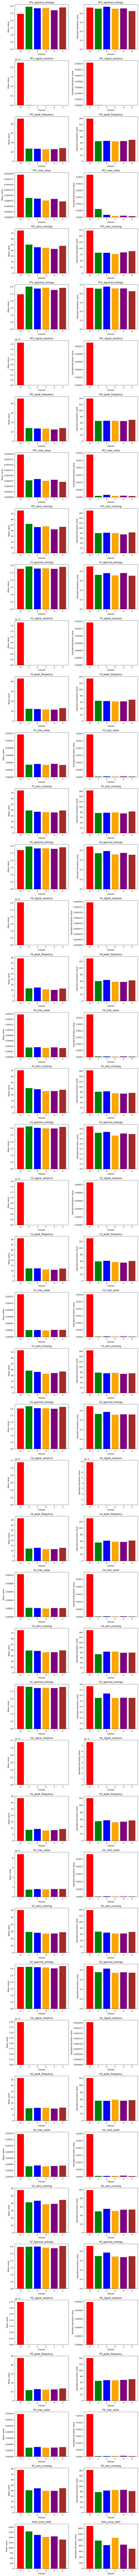

In [9]:
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown'] 
fig, axes = plt.subplots(nrows=46, ncols=2, figsize=(10, 4 * 46))
for idx, column in enumerate(columns[:-1]):
    mean = result[column]['mean']
    std = result[column]['std']
    stats = [mean, std]
    for i in range(6):
        for j in range(2):
            ax = axes[idx, j]
            ax.bar(i, stats[j][i], color=colors[i])
            ax.set_title(f'{column}')
            ax.set_xlabel('Classes')
            ax.set_ylabel(['Mean value', 'Standard deviation value'][j])


plt.tight_layout()
plt.show()

Drawing boxplots to see how data is spread

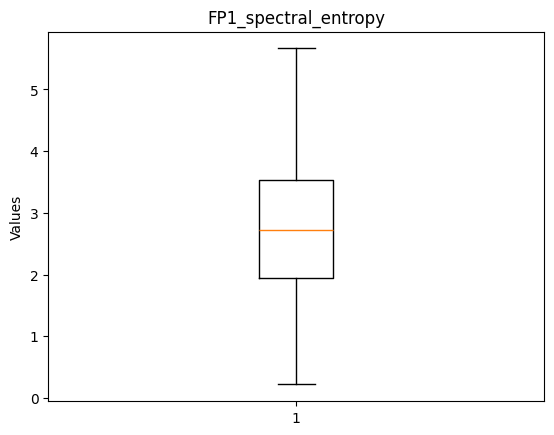

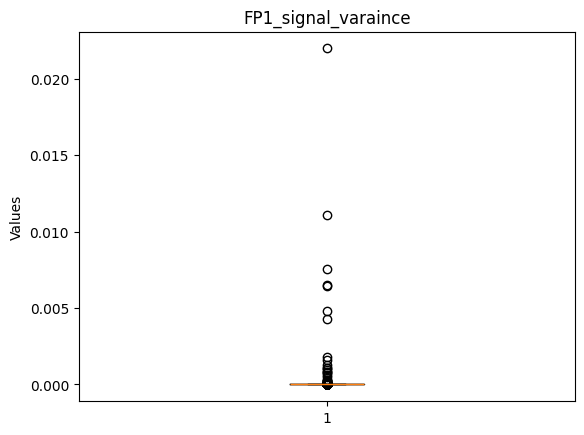

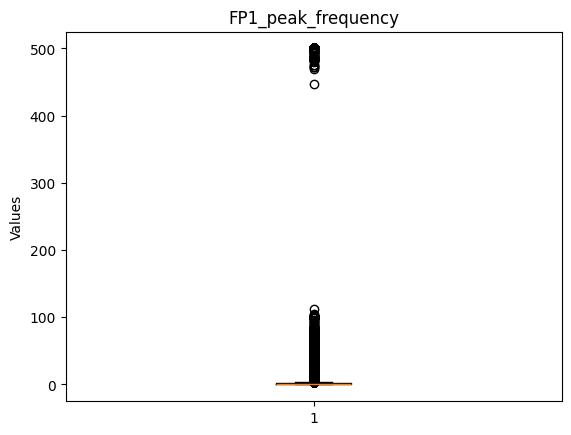

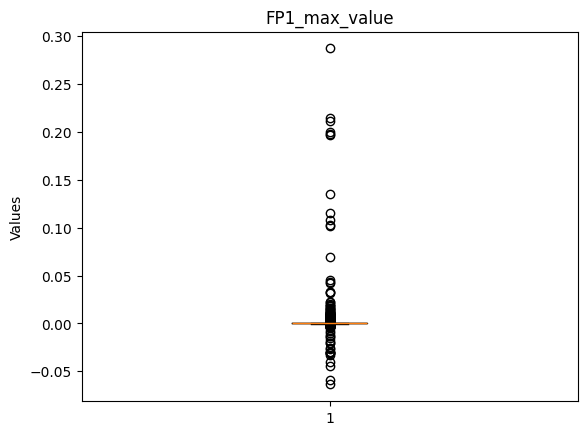

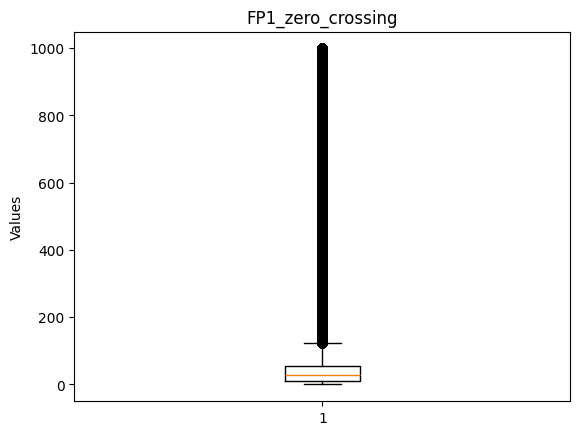

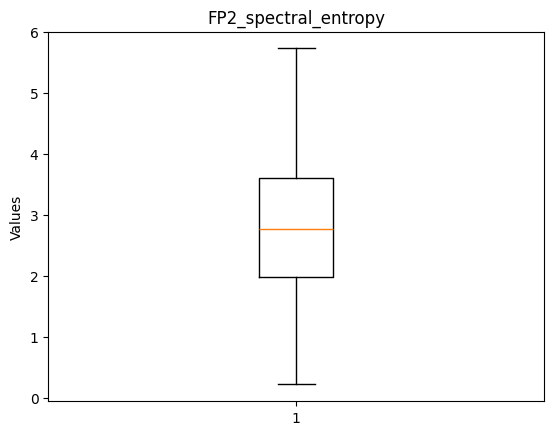

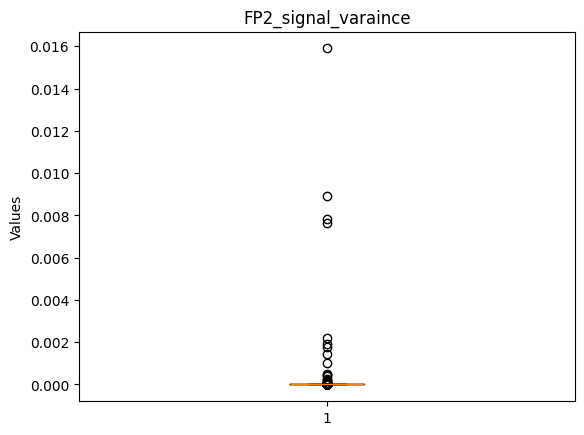

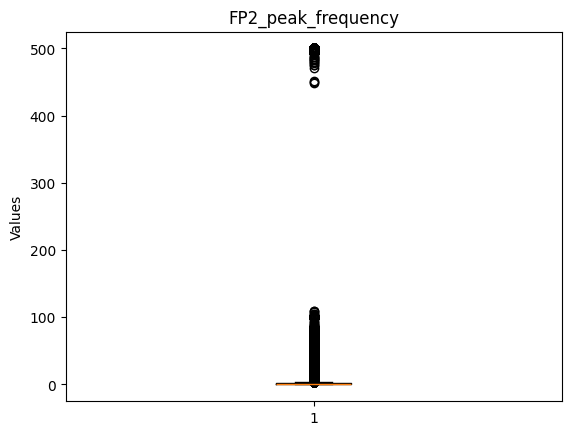

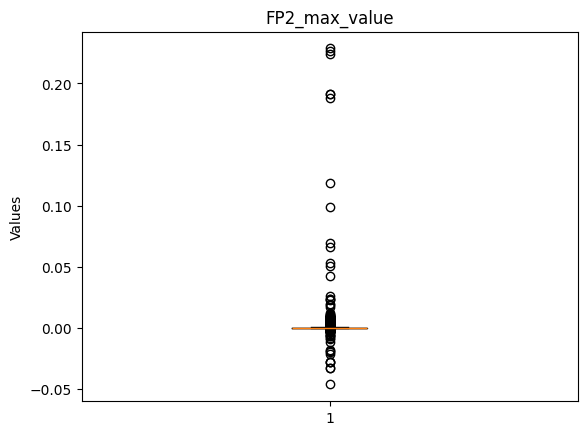

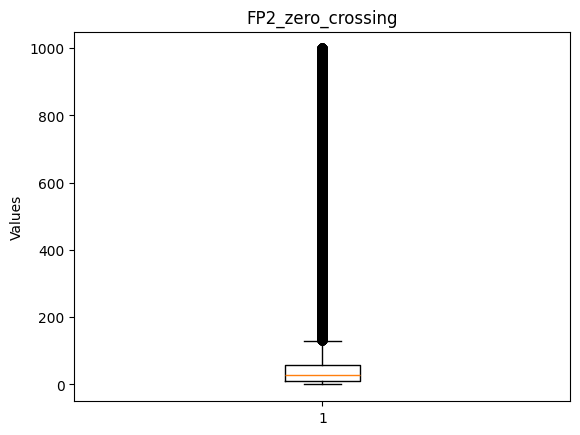

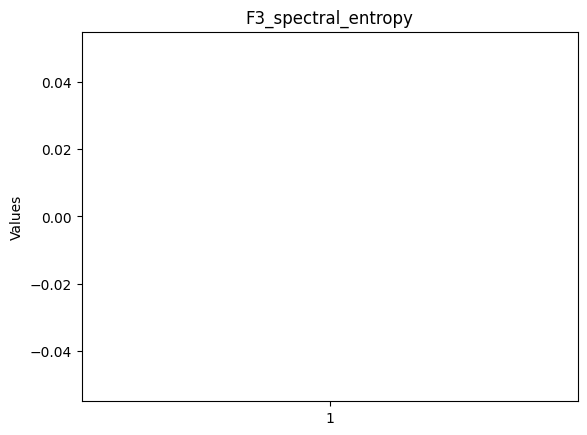

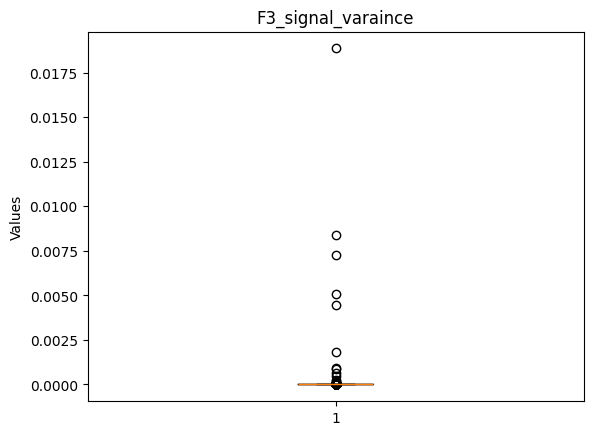

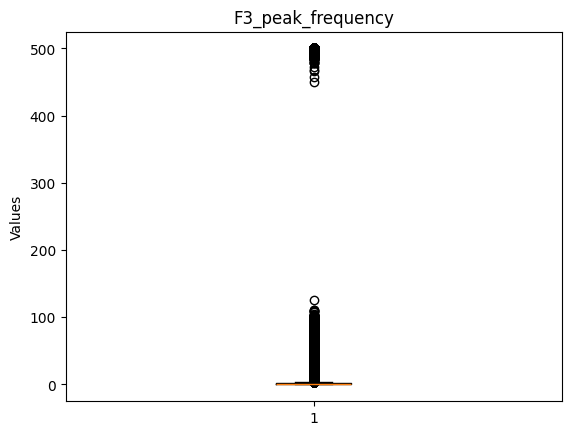

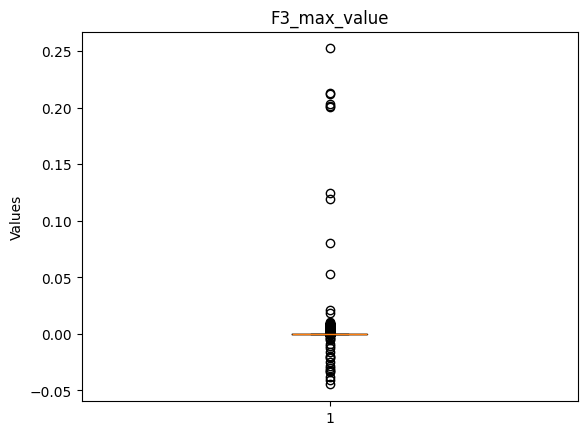

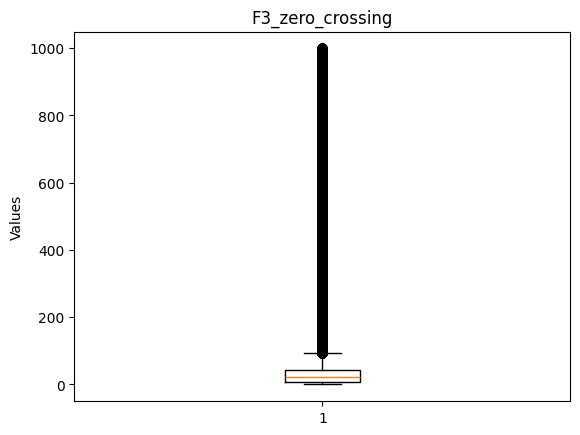

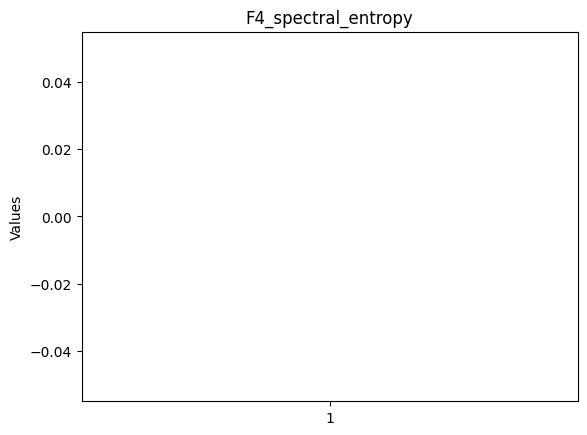

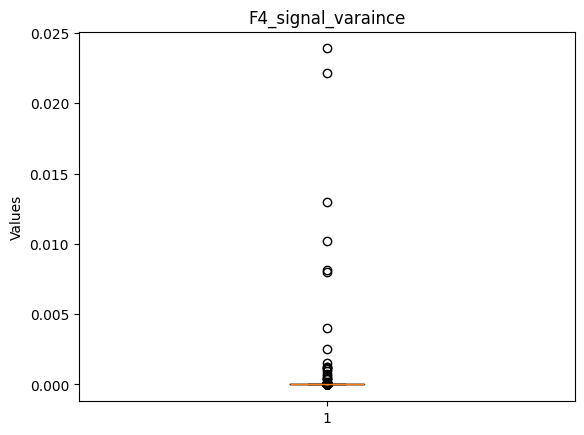

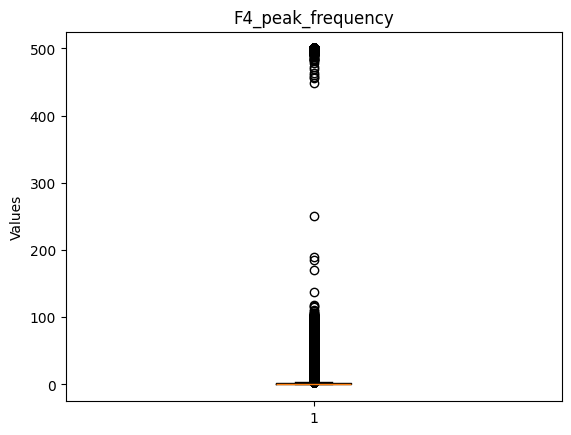

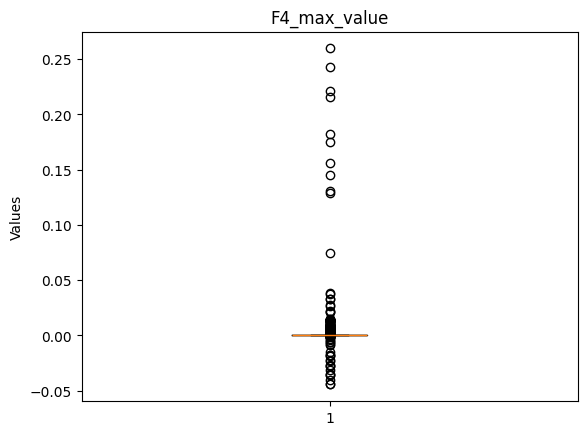

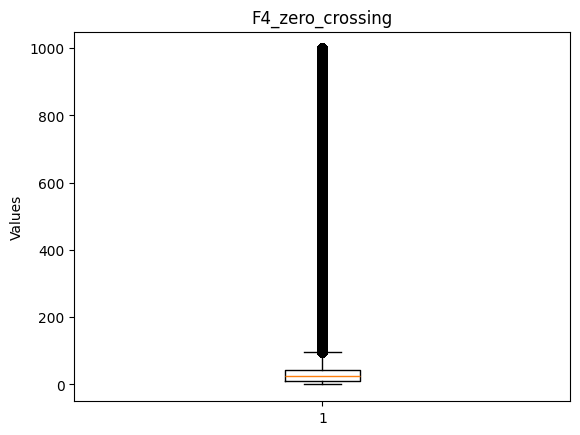

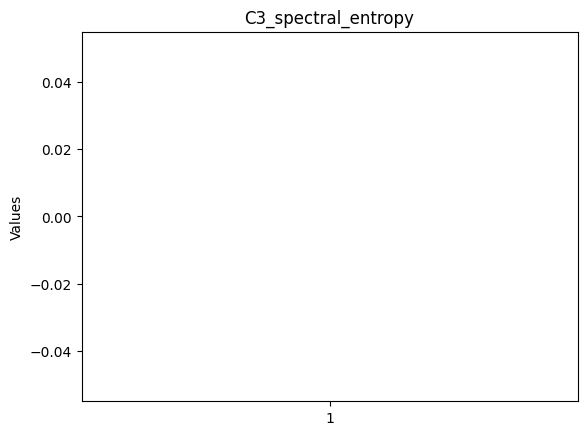

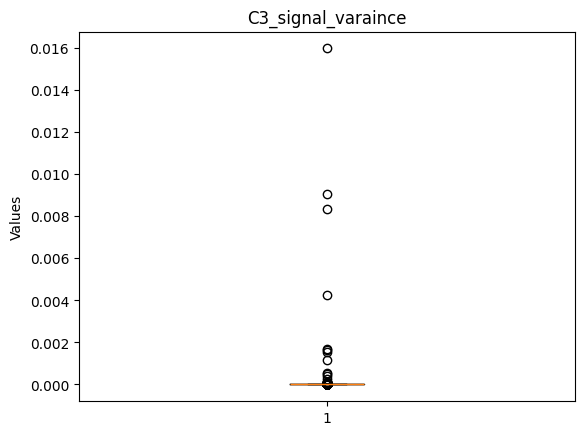

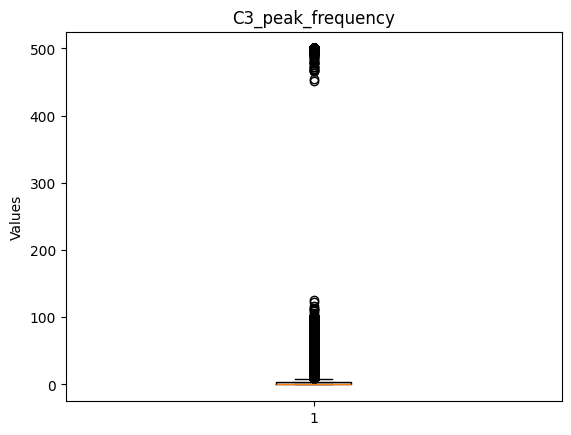

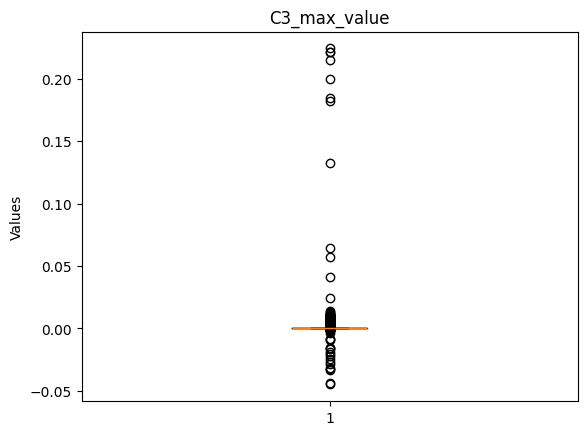

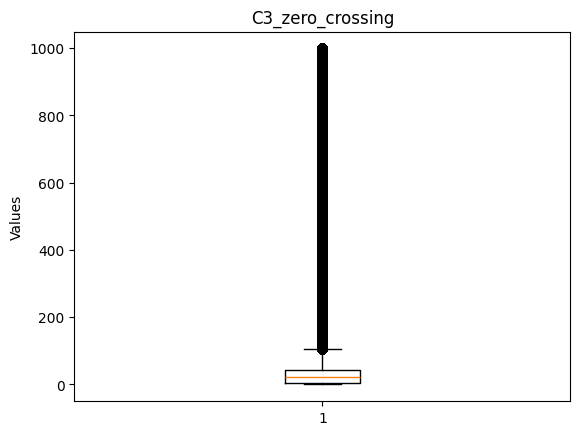

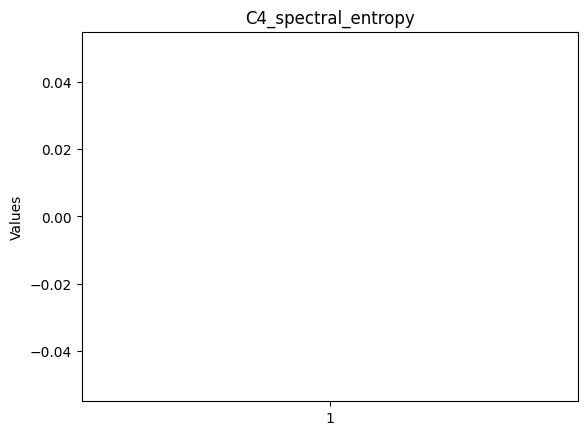

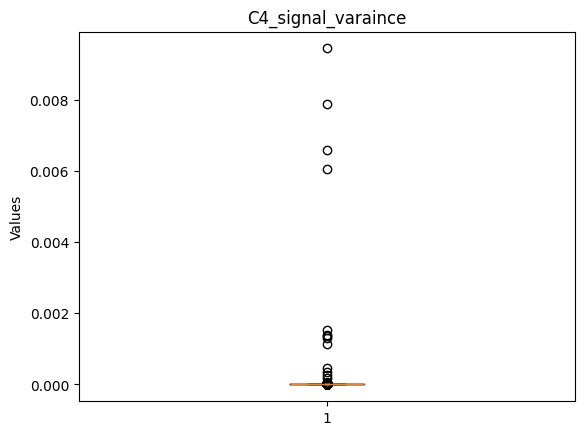

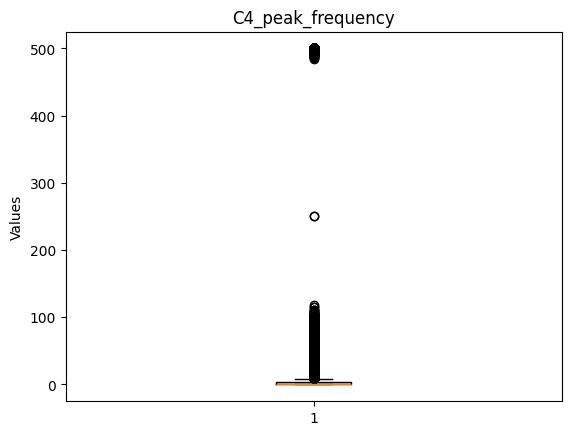

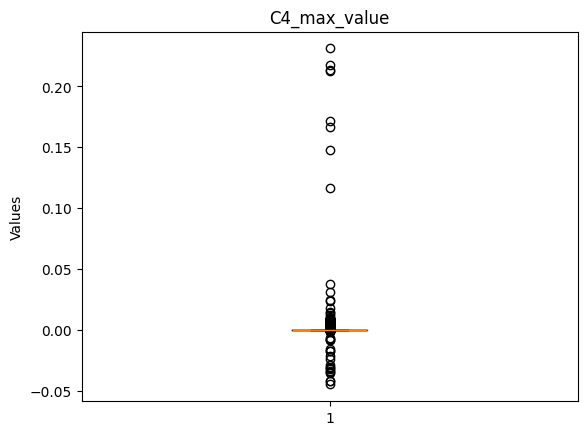

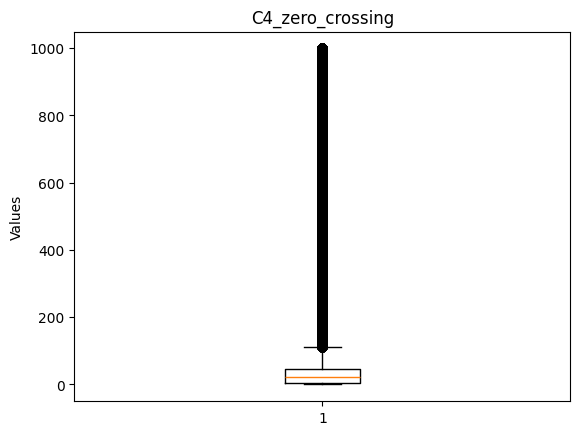

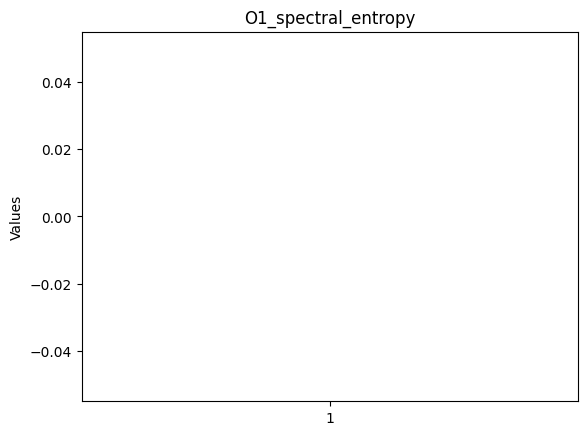

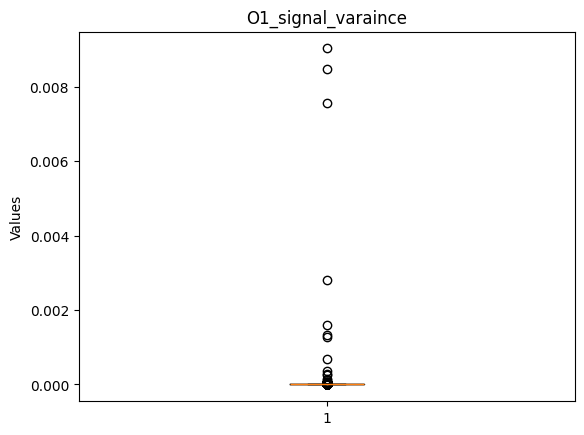

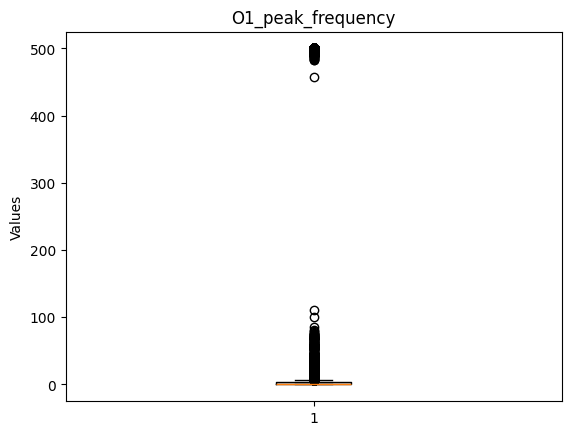

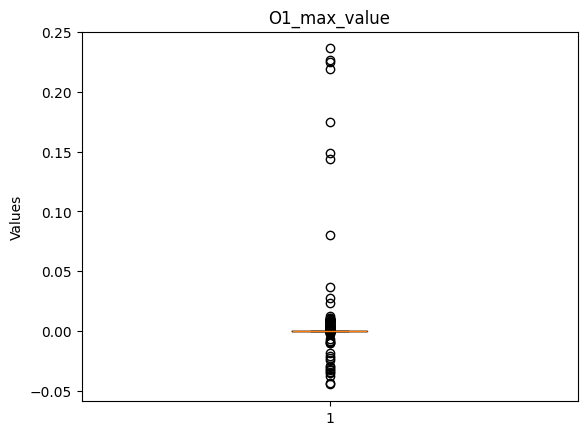

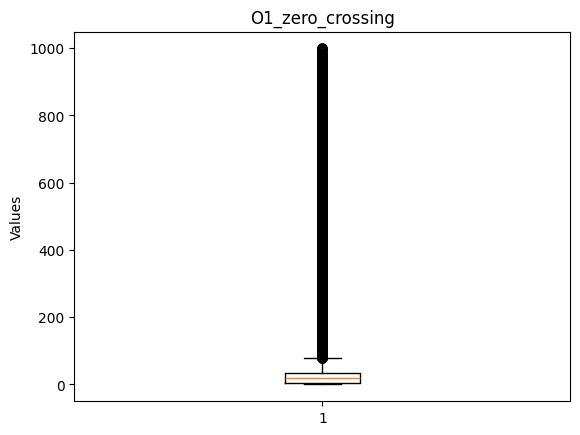

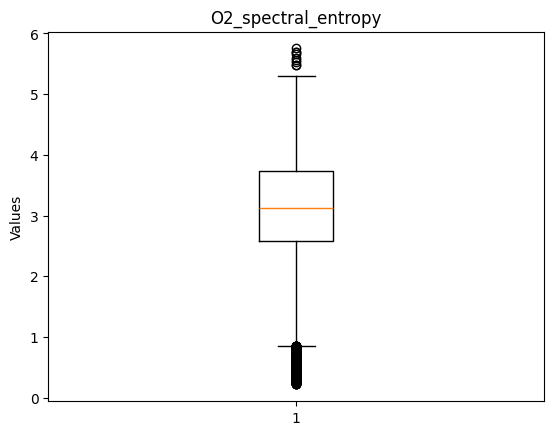

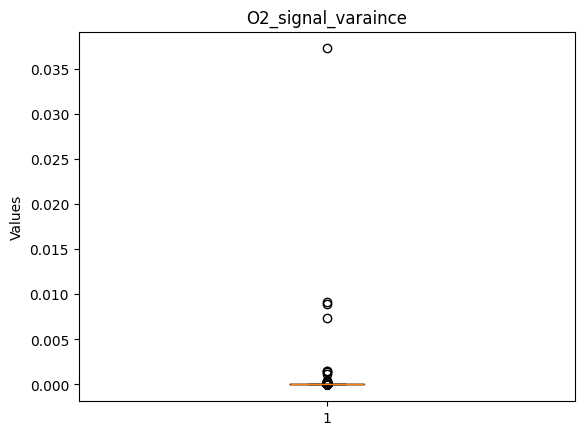

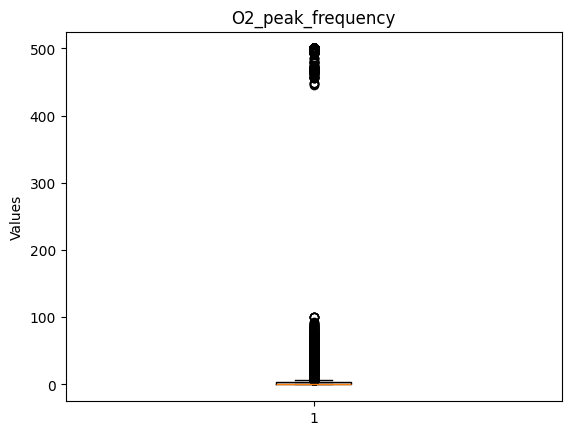

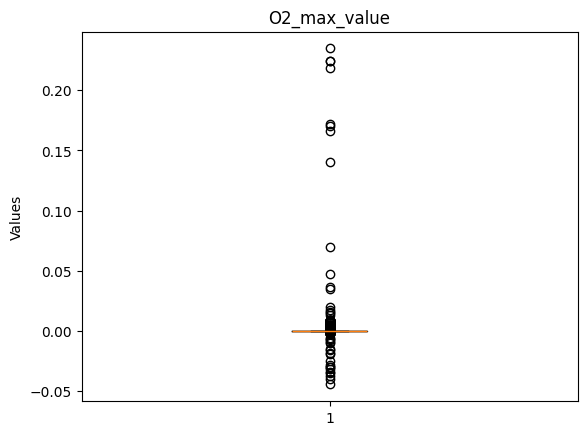

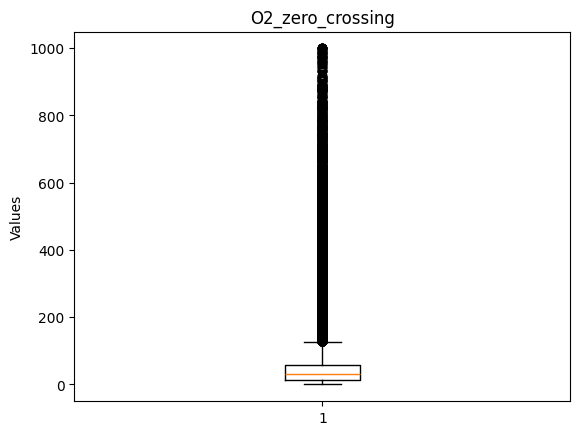

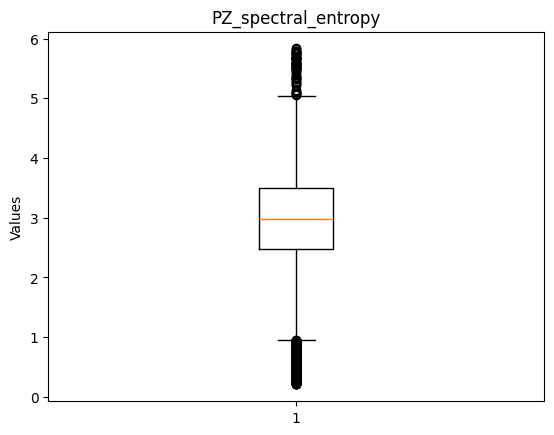

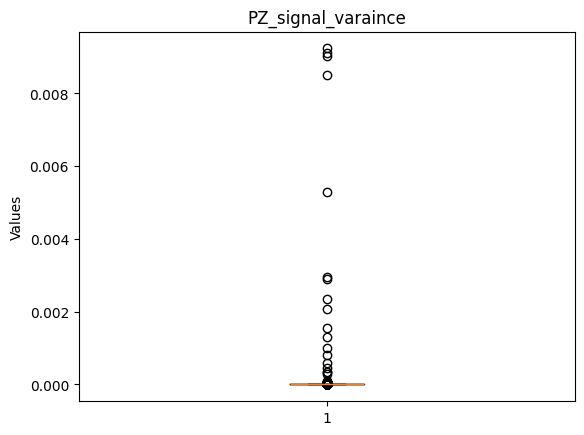

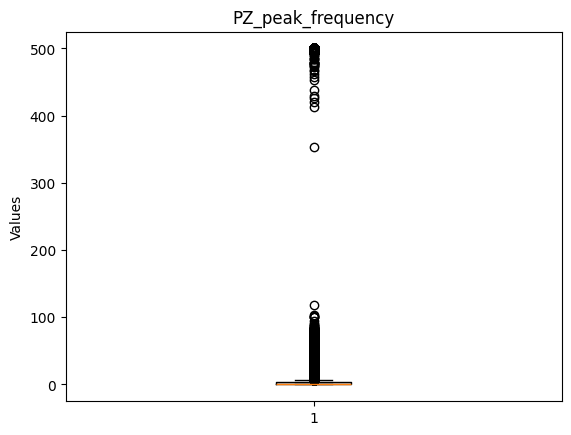

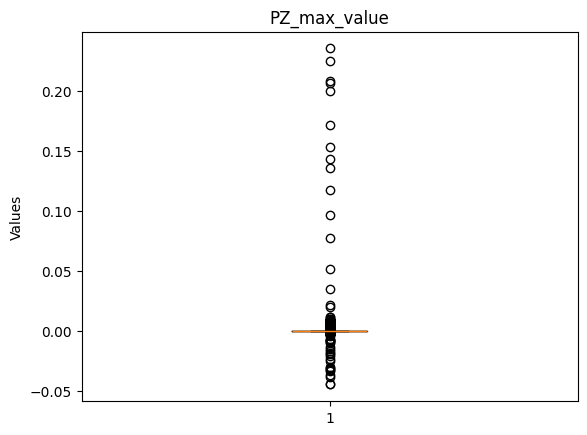

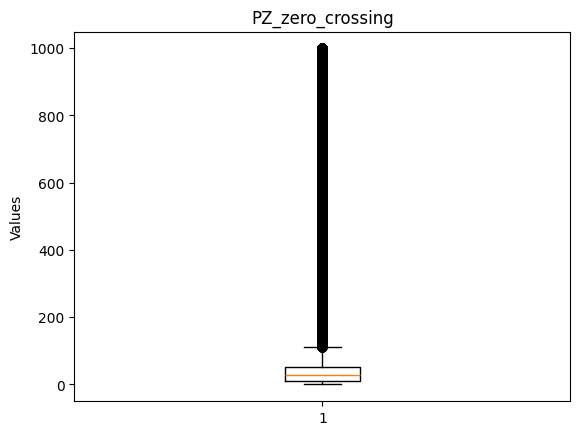

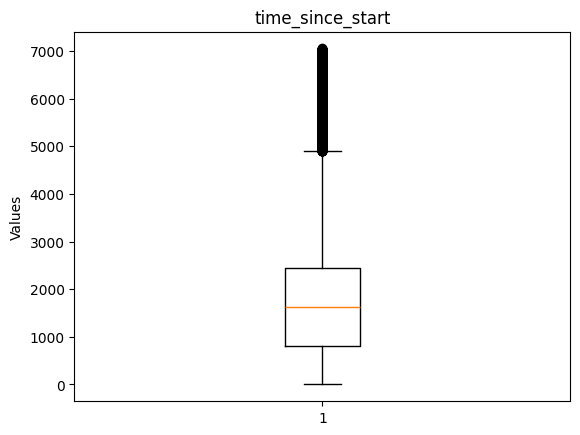

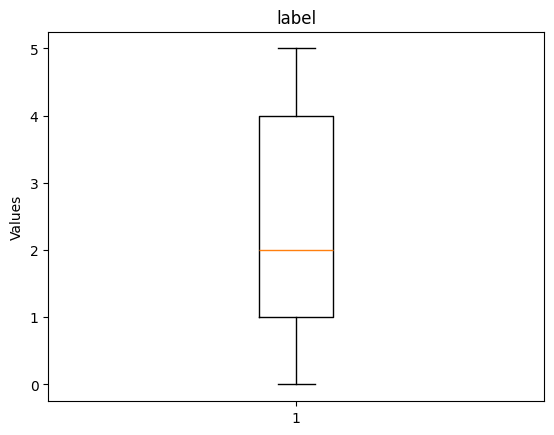

In [10]:
for column in columns:

    fig, ax = plt.subplots()
    ax.boxplot(df[column])
    ax.set_title(column)
    ax.set_ylabel('Values')
    plt.show()

Removing outlires

In [9]:
def identify_outliers(column, lower_quantile=0.025, upper_quantile=0.975):
    lower_bound = np.quantile(column, lower_quantile)
    upper_bound = np.quantile(column, upper_quantile)
    return (column < lower_bound) | (column > upper_bound)

outliers_mask = df.apply(lambda x: identify_outliers(x), axis=0)
df = df[~outliers_mask.any(axis=1)]

Ploting pie chart of classes to see if classes are evenly populated inside dataframe

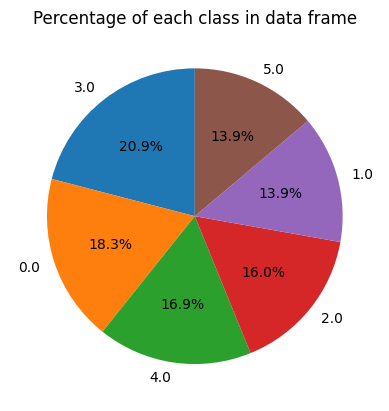

In [10]:
label_counts = df['label'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of each class in data frame')
plt.show()

Creating correlation matrix to see which features are strongly correalted

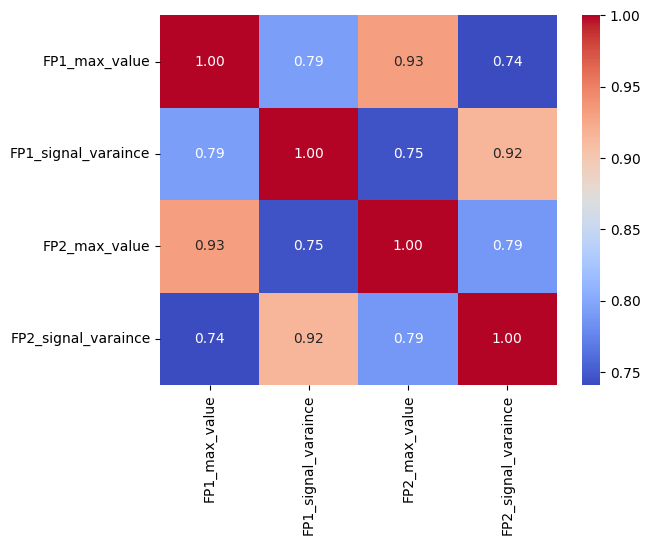

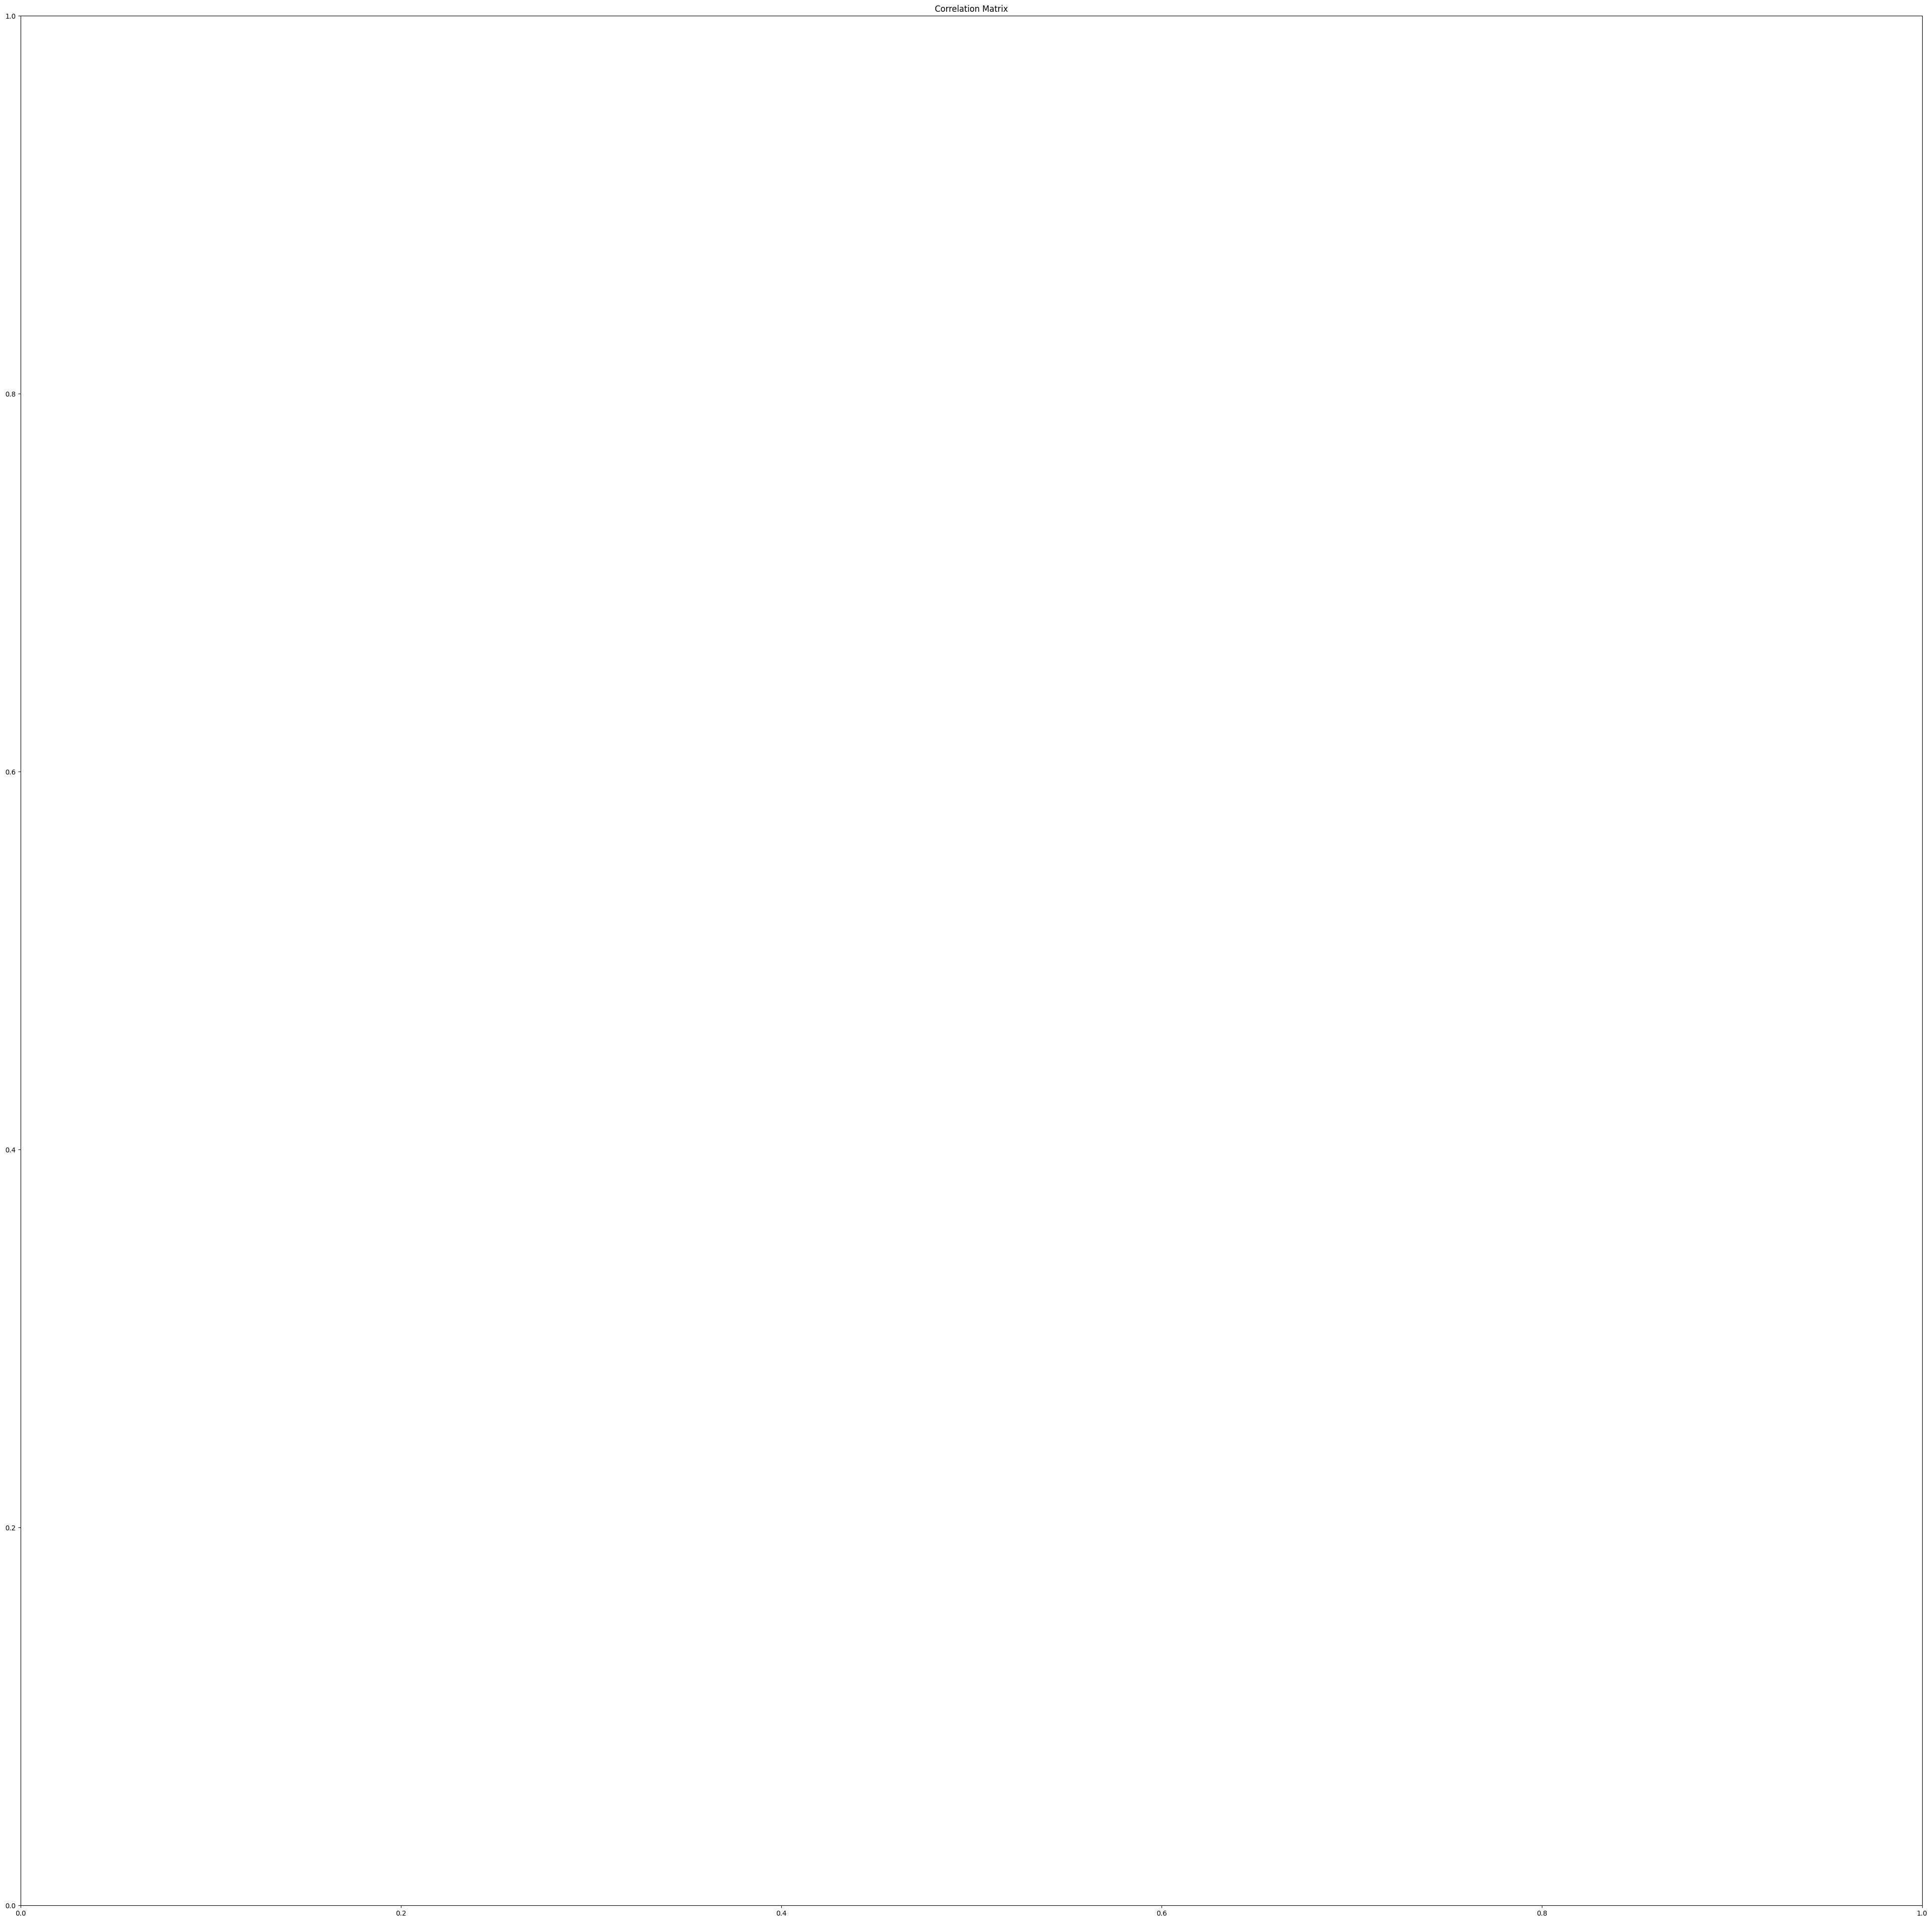

In [11]:
def absHighPass(df, absThresh):
    passed = set()
    for (r,c) in itertools.combinations(df.columns, 2):
        if (abs(df.loc[r,c]) >= absThresh):
            passed.add(r)
            passed.add(c)
    passed = sorted(passed)
    return df.loc[passed,passed]

corr_matrix = df.drop('label', axis=1).corr()
sns.heatmap(absHighPass(corr_matrix, 0.8), annot=True, cmap='coolwarm', fmt=".2f")

plt.figure(figsize=(50, 50))
plt.title('Correlation Matrix')
plt.show()

In [12]:
def remove_highly_correlated_data(df, correlation_matrix, treshold):
    highly_correlated_pairs = set()

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > treshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                pair = (colname_i, colname_j)
                highly_correlated_pairs.add(pair)

    columns_to_drop = set()
    for pair in highly_correlated_pairs:
        columns_to_drop.add(pair[1])

    return df.drop(columns=columns_to_drop)


In [13]:
df = remove_highly_correlated_data(df, corr_matrix, 0.9)
df.shape

(46325, 40)

In [14]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
test_data, val_data = train_test_split(test_data, test_size=0.5, random_state=42)

In [15]:
train_data.to_csv("../data/dataset_2000/train.csv")
test_data.to_csv("../data/dataset_2000/test.csv")
val_data.to_csv("../data/dataset_2000/val.csv")